# Background remove

La idea del código es tomar las todas las imágenes de un directorio y segmentar el objeto en la misma.

Lo que me faltó fue agregar una linea que permita guardar las imágenes resultantes.

In [1]:
### Importación de librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import glob
import datetime
import os

In [4]:
### Cargamos todas las imágenes del directorio

image_list = []

new_path = r'C:\Users\caoti\Desktop\Lemon Images\Results'

fecha = datetime.datetime.now()

for filename in glob.glob(r'C:\Users\caoti\Desktop\Lemon Images/*.jpg'):
    im =  cv.imread(filename)
    image_list.append(im)

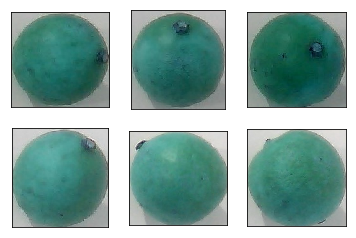

In [5]:
### Ploteado de varias imágenes de muestra

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(image_list[i])
    plt.xticks([]),plt.yticks([])

Empieza la segementación de las imágenes

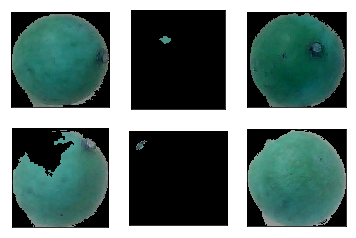

In [7]:
### Conversión de las imágenes a escala de grises

new_list = []

for img in image_list:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir la imagen a escala de grises
    
    th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV| 
                                 cv.THRESH_OTSU) # Hacer una segmentación del objeto
    
    # Encontrar los contornos
    cnts = cv.findContours(threshed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)[-2]
    cnts = sorted(cnts, key=cv.contourArea)
    
    for cnt in cnts: # Se interrumpe el ciclo si el valor es mayor
        if cv.contourArea(cnt) > 100:
            break
    # Se crea una mascara y se hace una operación bitwise
    mask = np.zeros(img.shape[:2],np.uint8)
    cv.drawContours(mask, [cnt],-1, 255, -1)
    dst = cv.bitwise_and(img, img, mask=mask)
    
    # Se agregan los resultados a una lista
    new_list.append(dst)
    
### Visualización de los resultados
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(new_list[i])
    plt.xticks([]),plt.yticks([])
    


La siguiente función guarda todas las imágenes resultantes en la carpeta indicada por la variable _new_path_. A la función hay que pasarle el parámetro de la longitud de la lista donde están las imágenes resultantes.

In [13]:
new_path = r'C:\Users\caoti\Desktop\Lemon Images\Results/'

def gen_name(num):
    for i in range(num):
        filename = new_path + 'img' + str(i) + '.png'
        print(filename)
        cv.imwrite(filename, new_list[i])

gen_name(len(new_list))

C:\Users\caoti\Desktop\Lemon Images\Results/img0.png
C:\Users\caoti\Desktop\Lemon Images\Results/img1.png
C:\Users\caoti\Desktop\Lemon Images\Results/img2.png
C:\Users\caoti\Desktop\Lemon Images\Results/img3.png
C:\Users\caoti\Desktop\Lemon Images\Results/img4.png
C:\Users\caoti\Desktop\Lemon Images\Results/img5.png
C:\Users\caoti\Desktop\Lemon Images\Results/img6.png
C:\Users\caoti\Desktop\Lemon Images\Results/img7.png
C:\Users\caoti\Desktop\Lemon Images\Results/img8.png
C:\Users\caoti\Desktop\Lemon Images\Results/img9.png
C:\Users\caoti\Desktop\Lemon Images\Results/img10.png
C:\Users\caoti\Desktop\Lemon Images\Results/img11.png
C:\Users\caoti\Desktop\Lemon Images\Results/img12.png
C:\Users\caoti\Desktop\Lemon Images\Results/img13.png
C:\Users\caoti\Desktop\Lemon Images\Results/img14.png
C:\Users\caoti\Desktop\Lemon Images\Results/img15.png
C:\Users\caoti\Desktop\Lemon Images\Results/img16.png
C:\Users\caoti\Desktop\Lemon Images\Results/img17.png
C:\Users\caoti\Desktop\Lemon Images\Re

C:\Users\caoti\Desktop\Lemon Images\Results/img156.png
C:\Users\caoti\Desktop\Lemon Images\Results/img157.png
C:\Users\caoti\Desktop\Lemon Images\Results/img158.png
C:\Users\caoti\Desktop\Lemon Images\Results/img159.png
C:\Users\caoti\Desktop\Lemon Images\Results/img160.png
C:\Users\caoti\Desktop\Lemon Images\Results/img161.png
C:\Users\caoti\Desktop\Lemon Images\Results/img162.png
C:\Users\caoti\Desktop\Lemon Images\Results/img163.png
